In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2230 - accuracy: 0.9349 - val_loss: 0.1099 - val_accuracy: 0.9652
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0854 - accuracy: 0.9749 - val_loss: 0.0732 - val_accuracy: 0.9776
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.0744 - val_accuracy: 0.9749
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0666 - val_accuracy: 0.9785
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.0579 - val_accuracy: 0.9823
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0650 - val_accuracy: 0.9791
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.0635 - val_accuracy: 0.9816
Epoch 

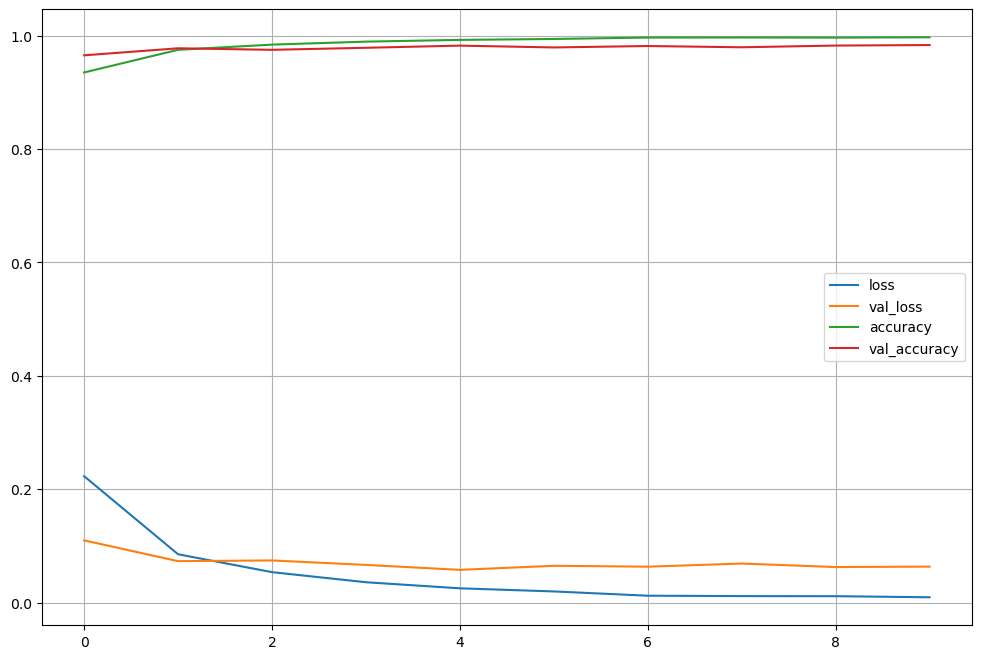

In [5]:
import matplotlib.pyplot as plt
### pyplot작업 시 커널 죽을 때
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [6]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9833


[0.0635671317577362, 0.983299970626831]

In [7]:
import numpy as np

predicted_result = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [8]:
np.argmax(predicted_result[0]) # 최대값의 인덱스를 반환해라

7

In [9]:
predicted_labels = np.argmax(predicted_result, axis=1)
print('Predict num :', predicted_labels[:10])
print('Real num :   ',y_test[:10])

Predict num : [7 2 1 0 4 1 4 9 5 9]
Real num :    [7 2 1 0 4 1 4 9 5 9]


## 잘못 예측한 데이터 보기

In [10]:
wrong_result = []

for n in range(0,len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

167

- 총 174개를 틀렸다.

## 랜덤으로 불러와 어떻게 틀렸는지 보자(어떻게 예측했나)

In [11]:
import random

samples = random.choices(population=wrong_result, k=16)

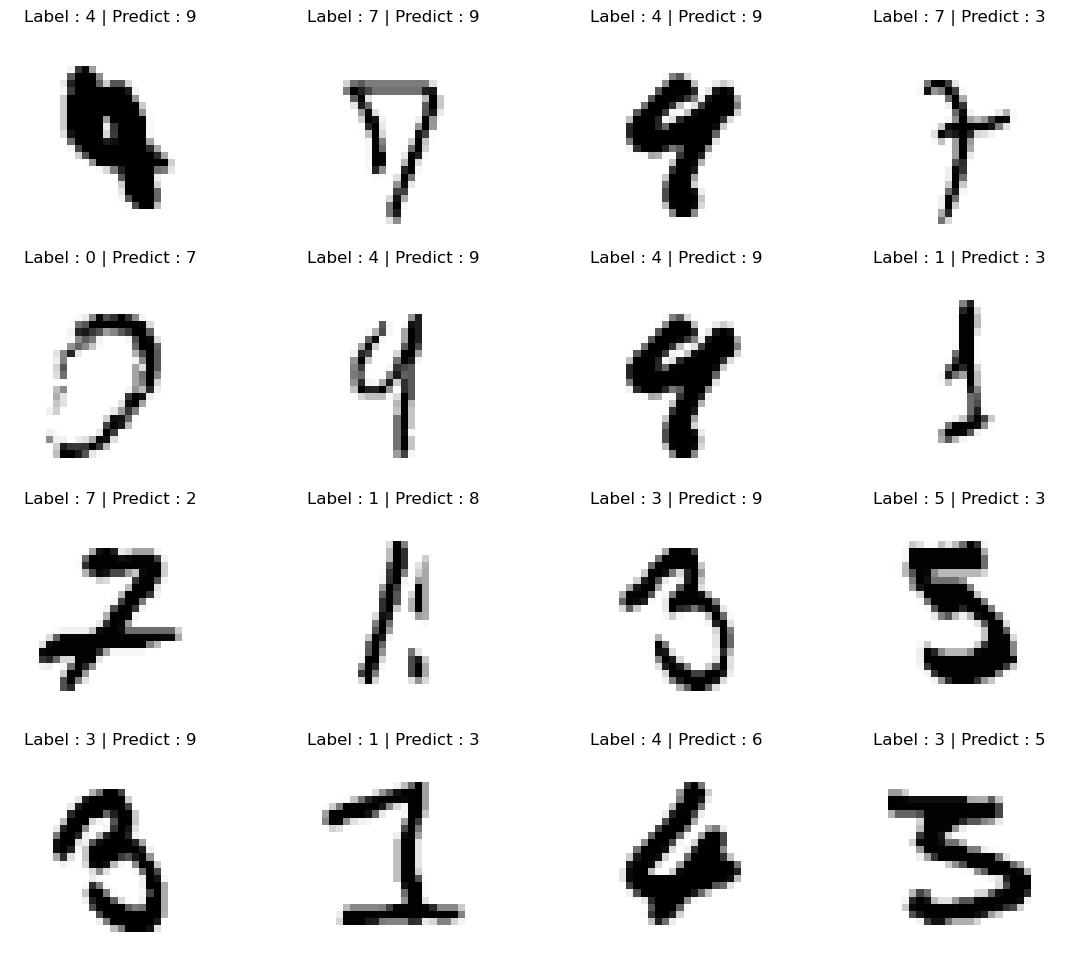

In [12]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.title('Label : '+str(y_test[n]) + ' | Predict : '+ str(predicted_labels[n]))
    plt.axis('off')

plt.show()